In [1]:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [41]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets,tree,preprocessing,metrics
import pandas as pd

In [42]:
ls

 Random Forest Fraud.ipynb           Problem_statement(Fraudcheck).txt
Company_Data.csv                     problem statement(company data).txt
Fraud_check.csv


In [43]:
f_data=pd.read_csv("Fraud_check.csv")
f_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EAD

In [44]:
data=f_data.rename({'Undergrad':'UD','Marital.Status':'MS','Taxable.Income':'TxIN','City.Population':'Cpop',
             'Work.Experience':'Wexp','Urban':'Urb'},axis=1)

In [45]:
data.isna()

,UD,MS,TxIN,Cpop,Wexp,Urb
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [46]:
data.shape

(600, 6)

In [47]:
label_encoder = preprocessing.LabelEncoder()
data['Urb']= label_encoder.fit_transform(data['Urb']) 
label_encoder1 = preprocessing.LabelEncoder()
data['UD']= label_encoder1.fit_transform(data['UD']) 
data=pd.get_dummies(data) #getting dummy variable for 'Marital.Status

In [48]:
data

,UD,TxIN,Cpop,Wexp,Urb,MS_Divorced,MS_Married,MS_Single
0,0,68833,50047,10,1,0,0,1
1,1,33700,134075,18,1,1,0,0
2,0,36925,160205,30,1,0,1,0
3,1,50190,193264,15,1,0,0,1
4,0,81002,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,1,0,0
596,1,69967,55369,2,1,1,0,0
597,0,47334,154058,0,1,1,0,0
598,1,98592,180083,17,0,0,1,0


In [49]:
#Assigning The Risky or good by applying condition 
data_y=[]
for x in data['TxIN']:
    if(x<=30000):
        data_y.append(0)
    else:
        data_y.append(1)

In [50]:
#Assigning new column values
data['data_y']=data_y

In [51]:
data['data_y'].value_counts()

1    476
0    124
Name: data_y, dtype: int64

In [52]:
#Getting co-relation between varible
data.corr()

,UD,TxIN,Cpop,Wexp,Urb,MS_Divorced,MS_Married,MS_Single,data_y
UD,1.000000,-0.049232,0.079579,-0.005362,-0.000267,-0.045101,0.015120,0.028883,-0.012523
TxIN,-0.049232,1.000000,-0.064387,-0.001818,0.070628,0.062099,-0.100611,0.037910,0.688725
Cpop,0.079579,-0.064387,1.000000,0.013135,-0.040098,0.004925,-0.007035,0.002087,-0.012225
Wexp,-0.005362,-0.001818,0.013135,1.000000,-0.094559,-0.014833,0.033347,-0.018123,0.001972
Urb,-0.000267,0.070628,-0.040098,-0.094559,1.000000,-0.065518,0.016771,0.047014,-0.004830
MS_Divorced,-0.045101,0.062099,0.004925,-0.014833,-0.065518,1.000000,-0.468757,-0.510435,0.027115
MS_Married,0.015120,-0.100611,-0.007035,0.033347,0.016771,-0.468757,1.000000,-0.520317,-0.043178
MS_Single,0.028883,0.037910,0.002087,-0.018123,0.047014,-0.510435,-0.520317,1.000000,0.015820
data_y,-0.012523,0.688725,-0.012225,0.001972,-0.004830,0.027115,-0.043178,0.015820,1.000000


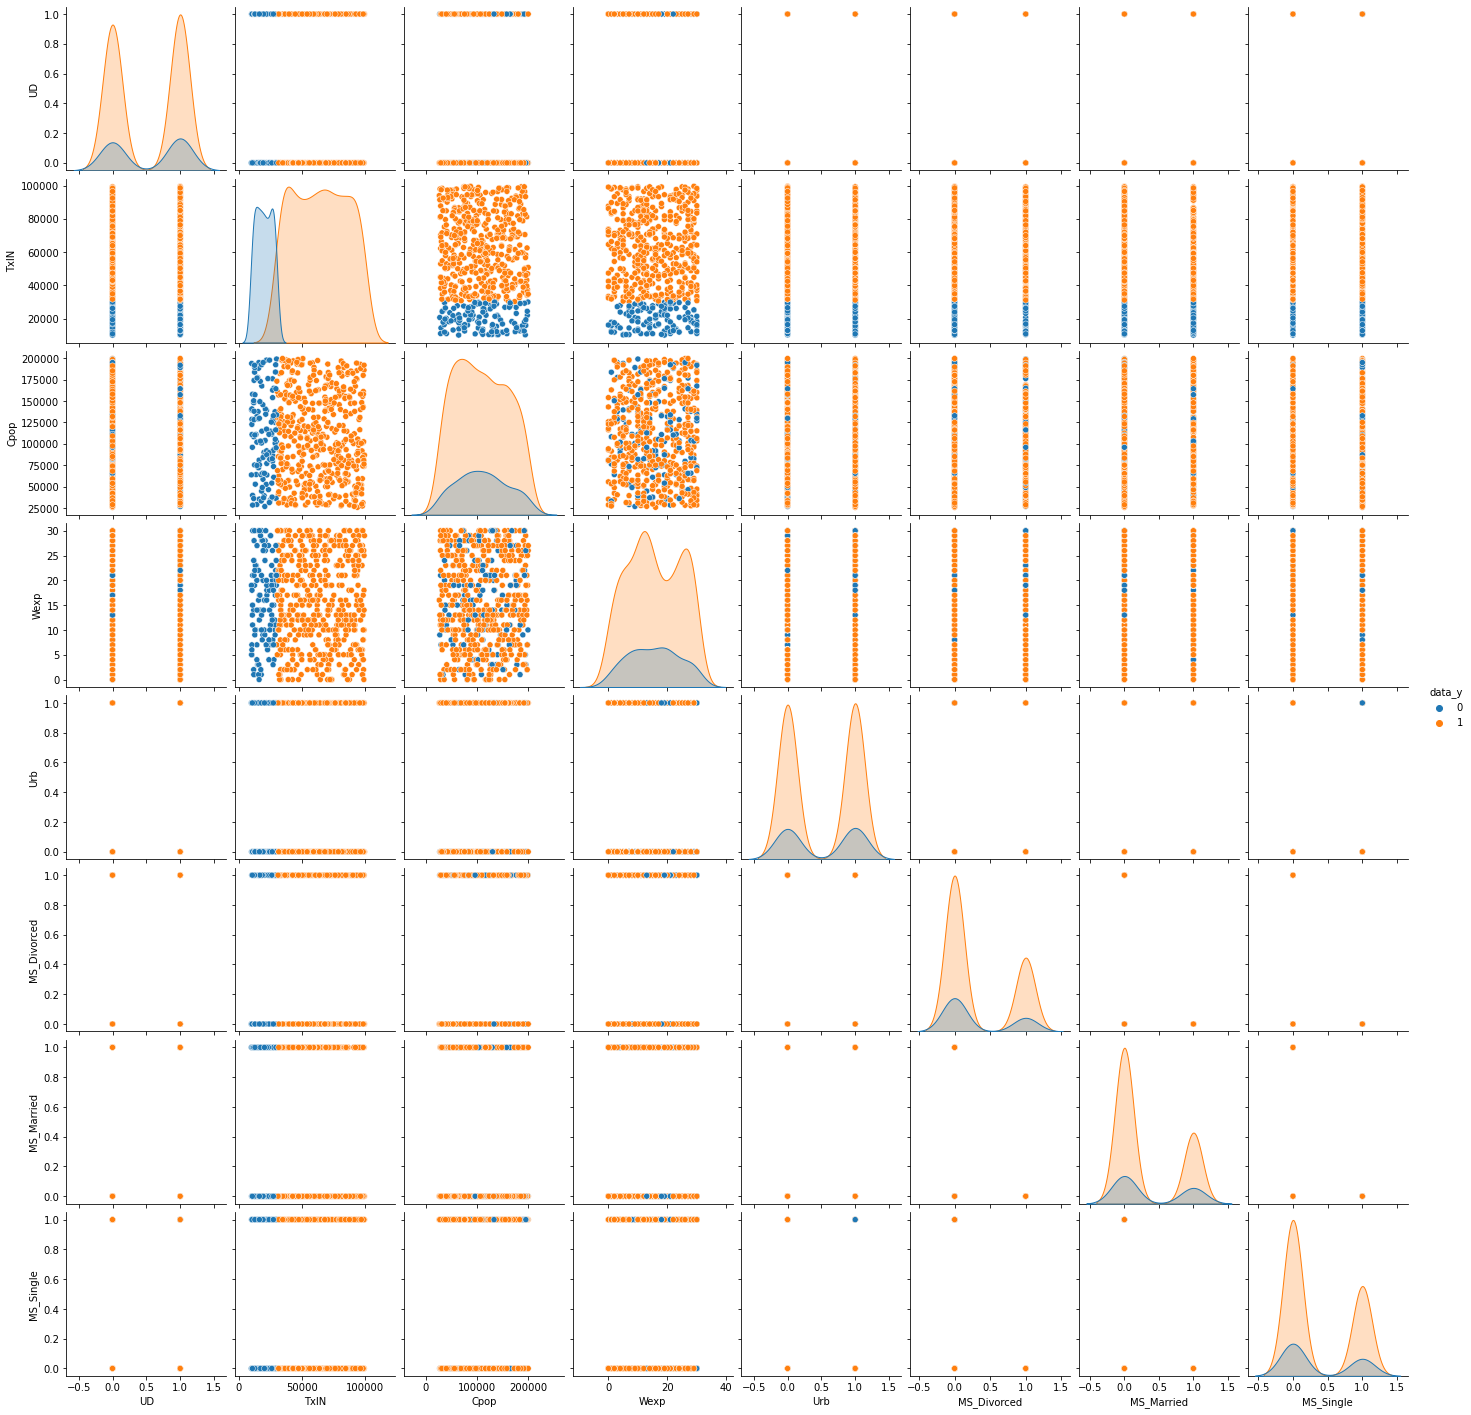

In [53]:
#Visual representation of Data
import seaborn as sns
sns.pairplot(data,hue='data_y')

In [54]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [62]:
num_trees = 80

max_features = 8

kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())



0.9983333333333334
